In [9]:
import json
from sparse_wf.geometry import Geometry, save_geometries
from pathlib import Path
import numpy as np

In [2]:
root_dir = Path('../data/zhai_et_al_2023')
geometries = []
for p in root_dir.glob('**/*.xyz'):
    geom = Geometry.from_xyz(p)
    basis = p.parts[-2]
    state, comment = geom.name.split(' , ')
    name = f'zhai_et_al_2023_{state}_{basis}'
    geom.name = name
    geom.comment = comment
    geom.charge = -3
    geom.spin = 0
    geometries.append(geom)

In [22]:
geometries

[<Geometry zhai_et_al_2023_HFe_df2-tzvp, bf4fb3e218b9d176be7e190ba67be6a8__Energy = -5076.012745 H, 180 el>,
 <Geometry zhai_et_al_2023_HC_df2-tzvp, d2ab5ed9100089164f44218903b1a759__Energy = -5076.012745 H, 180 el>,
 <Geometry zhai_et_al_2023_HFe2_df2-tzvp, 93016ecccaf601b8ee00c69b76c85261__Energy = -5076.012745 H, 180 el>,
 <Geometry zhai_et_al_2023_HS_df2-tzvp, 4fb2150a89f58e079cbe1d15e88af16f__Energy = -5076.012745 H, 180 el>,
 <Geometry zhai_et_al_2023_HFe_df2-svp, ea7feb8dbe897367eb48434b26281a81__Energy = -4717.084045403 H, 180 el>,
 <Geometry zhai_et_al_2023_HC_df2-svp, cdc209c511c0bc5b02ac2f01d5ae0261__Energy = -4717.139080700 H, 180 el>,
 <Geometry zhai_et_al_2023_HFe2_df2-svp, b258b494c13f11700e7f393b62912d3b__Energy = -4717.102540727 H, 180 el>,
 <Geometry zhai_et_al_2023_HS_df2-svp, 84434e1f00f7b94038c9f953f1c0037c__Energy = -4717.096074143 H, 180 el>]

(array([1.98035515, 1.97549703, 1.84358131, 1.84427177, 1.35299026,
        1.8467489 , 1.84327744, 1.09514437, 1.0977951 , 1.09692297,
        1.09811315, 1.10381102, 1.0977951 , 1.10088236, 1.09948528,
        1.10527184, 1.09811315, 1.10546555, 1.10381102, 1.09514437,
        1.10433283, 1.10532869, 1.09692297, 1.10577667, 1.1021446 ,
        1.35299026, 1.09803705]),
 array([ 6,  6,  6,  6,  1,  6,  6,  1,  1,  1,  1,  1,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6, 16,  6]))

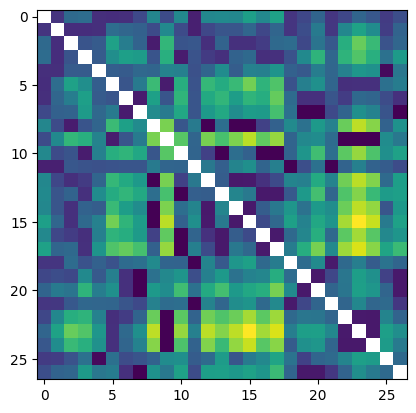

In [41]:
import matplotlib.pyplot as plt
BOHR_TO_ANGSTROM = 0.52917721067
ANGSTROM_TO_BOHR = 1.0 / BOHR_TO_ANGSTROM
g = geometries[3]
charges = g.Z
coords = g.R
order = np.argsort(charges)[::-1]
charges = charges[order]
coords = coords[order]
dists = np.linalg.norm(coords[:, None] - coords, axis=-1) + np.diag([np.nan] * dists.shape[0])
plt.imshow(dists)
idx = np.nanargmin(dists, axis=1)
np.nanmin(dists, axis=1) * BOHR_TO_ANGSTROM * BOHR_TO_ANGSTROM, charges[idx]

In [44]:
for g in geometries:
    dists = np.linalg.norm(g.R - g.R[:, None], axis=-1)
    dists += np.diag([np.nan] * dists.shape[0])
    print(np.nanmin(dists) * BOHR_TO_ANGSTROM)

2.0696101892693677
2.068369607550092
2.0727554098522925
2.0695229353165465
1.1082513464193566
1.1081980668833682
1.1103094686706254
1.109506720272294


In [45]:
for g in geometries:
    dists = np.linalg.norm(g.R - g.R[:, None], axis=-1)
    dists += np.diag([np.nan] * dists.shape[0])
    print(np.nanmin(dists) * BOHR_TO_ANGSTROM * BOHR_TO_ANGSTROM)

1.0951905471317749
1.0945340595579602
1.0968549261867888
1.0951443743284008
0.586461356219467
0.5864331619032269
0.5875504676116113
0.5871256714533124


In [6]:
for g in geometries:
    print(g.name)

zhai_et_al_2023_HFe_df2-tzvp
zhai_et_al_2023_HC_df2-tzvp
zhai_et_al_2023_HFe2_df2-tzvp
zhai_et_al_2023_HS_df2-tzvp
zhai_et_al_2023_HFe_df2-svp
zhai_et_al_2023_HC_df2-svp
zhai_et_al_2023_HFe2_df2-svp
zhai_et_al_2023_HS_df2-svp


In [5]:
save_geometries({g.hash: g for g in geometries})

In [3]:
with open('../data/geometries.json') as inp:
    geom = json.load(inp)

In [7]:
new_structures = []
for g in geom.values():
    if 'cumulene' in g['name']:
        new_structures.append({
            'name': g['name'] + '_singlet',
            'comment': g['comment'] + '_singlet',
            'R': g['R'],
            'Z': g['Z'],
            'spin': 0
        })
        new_structures.append({
            'name': g['name'] + '_triplet',
            'comment': g['comment'] + '_triplet',
            'R': g['R'],
            'Z': g['Z'],
            'spin': 2
        })

In [13]:
new_structures=[Geometry(**g) for g in new_structures]

In [17]:
new_structures = {g.hash: g for g in new_structures}

In [19]:
save_geometries(new_structures)